## Algoritmos de regresión


### Regresión Lineal con Scikit-learn


**1. Definición y Motivación**

- **¿Qué es la regresión lineal?**
    - La regresión lineal es una técnica estadística utilizada para modelar la relación entre una variable dependiente (target) y una o más variables independientes (predictores) mediante el ajuste de una ecuación lineal.
    - En Scikit-learn, esto se maneja mediante el módulo `LinearRegression`.
- **Casos de uso y ejemplos en la vida real.**
    - Predicción de precios de viviendas a partir de características como área, ubicación, etc.
    - Estimación del rendimiento de los estudiantes en función de horas de estudio, asistencia, etc.
    - Análisis de ventas futuras basadas en publicidad y campañas de marketing.

**2. Conceptos Teóricos**

- **Ecuación de la recta: $y = mx + b$ o $y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$ para múltiples predictores.**
    - Scikit-learn utiliza la forma de matriz de esta ecuación ($y = X \beta + \epsilon$) para múltiples variables.
    - `y` es la variable dependiente, `X` es la matriz de variables independientes, $\beta$ es el vector de coeficientes, y $\epsilon$ es el error.
- **Mínimos cuadrados: minimizar la suma de los cuadrados de los errores.**
    - Scikit-learn resuelve esto utilizando una técnica llamada "Mínimos Cuadrados Ordinarios" para encontrar el mejor $\beta$.
    - La idea es minimizar la suma de cuadrados de las diferencias entre los valores observados y los predichos.
- **Coeficientes y su interpretación.**
    - Los coeficientes $\beta$ representan el cambio en `y` por un cambio unitario en `x`.
    - En Scikit-learn, estos se pueden obtener utilizando `.coef_` y `.intercept_` en el modelo entrenado.



Al enseñar estos conceptos, es importante mostrar código concreto utilizando Scikit-learn para establecer el modelo de regresión lineal, así como métodos para validar estas suposiciones, lo cual se puede lograr usando visualizaciones y tests estadísticos disponibles en bibliotecas como Statsmodels o Seaborn para complementar Scikit-learn.

Coeficientes:  [3.0025452]
Intercepto:  6.994915863125987
Error cuadrático medio:  4.0514664895197345
Coeficiente de determinación:  0.6690062710741044


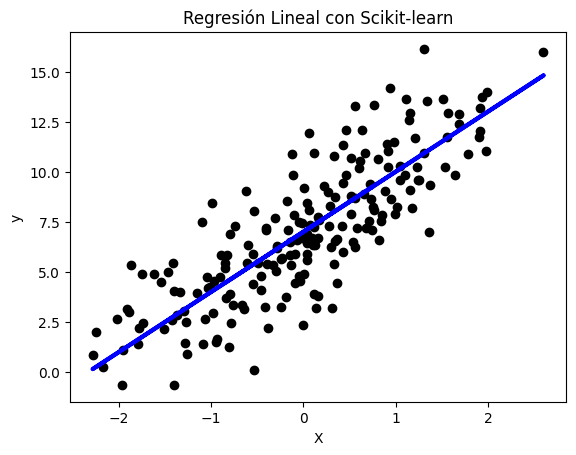

In [55]:
# Importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crear un conjunto de datos simple
# X: características, y: variable objetivo
X = np.random.randn(1000)
y = 3*X + 7 + np.random.normal(0, 2, size=X.shape)
X = X.reshape(-1,1)
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Coeficientes: ", model.coef_)
print("Intercepto: ", model.intercept_)
print("Error cuadrático medio: ", mse)
print("Coeficiente de determinación: ", r2)

# Visualizar los resultados
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresión Lineal con Scikit-learn')
plt.show()

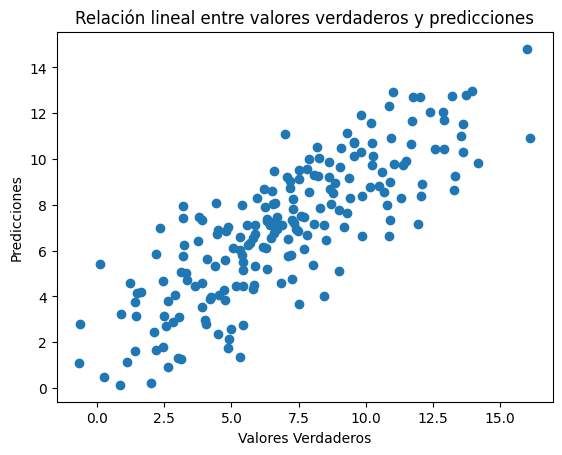

Media de residuos: -0.01696815619360221


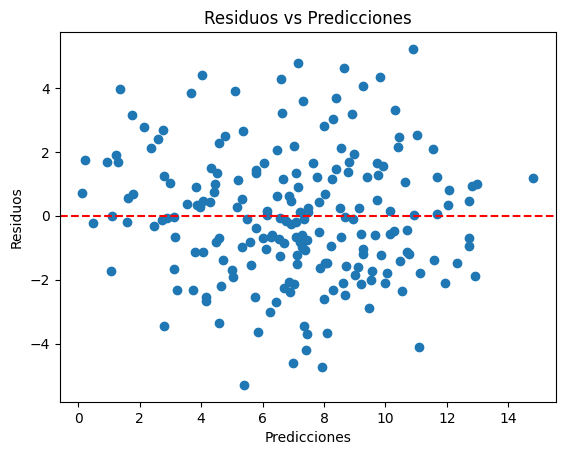

Valor de Durbin-Watson: 2.1207977245489955


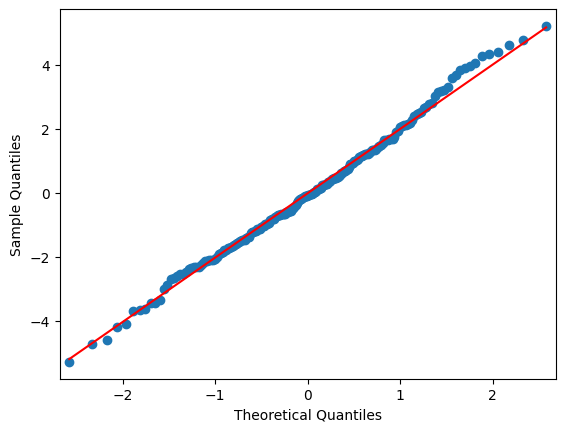

Kolmogorov-Smirnov statistic: 0.17984565339091746
Kolmogorov-Smirnov p-value: 3.934697796859881e-06


In [57]:
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats

# Ajustar el modelo y hacer predicciones
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calcular los residuos
residuos = y_test - y_pred

# 1. Verificar la linealidad
# Esto puede ser visualmente verificado con un gráfico de dispersión de los valores observados versus los predichos
plt.scatter(y_test, y_pred)
plt.xlabel("Valores Verdaderos")
plt.ylabel("Predicciones")
plt.title("Relación lineal entre valores verdaderos y predicciones")
plt.show()

# 2. La media de los residuos debería ser aproximadamente cero
print("Media de residuos:", np.mean(residuos))

# 3. Verificar homocedasticidad (varianza constante de errores)
# Esto también puede ser visualmente verificado con un gráfico de dispersión
plt.scatter(y_pred, residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Residuos vs Predicciones")
plt.show()

# 4. Verificar independencia de los errores
# A menudo esto está relacionado con la naturaleza temporal de los datos. Puedes usar el test de Durbin-Watson de statsmodels
dw = sm.stats.durbin_watson(residuos)
print("Valor de Durbin-Watson:", dw)

# 5. Verificar normalidad de los errores
# Esto puede ser visualmente verificado con un QQ plot
sm.qqplot(residuos, line='s')
plt.show()

# Otra opción es realizar una prueba de normalidad como la de Kolmogorov-Smirnov
ks_statistic, ks_p_value = stats.kstest(residuos, 'norm')
print("Kolmogorov-Smirnov statistic:", ks_statistic)
print("Kolmogorov-Smirnov p-value:", ks_p_value)


### Regresión Polinómica




La regresión polinómica es un tipo de análisis de regresión en el que la relación entre la variable independiente y la variable dependiente se modela con un polinomio de grado n. La regresión polinómica puede captar relaciones no lineales entre las variables pero también puede causar sobreajuste si el grado del polinómio es muy alto. La regresión polinómica se considera un caso especial de regresión lineal múltiple, ya que el problema de estimación es lineal en los coeficientes del polinomio.

#### ¿Cuándo y por qué usar la Regresión Polinómica?
* Cuando las relaciones entre las variables no son lineales y el modelo necesita capturar curvas en los datos.
* Casos en los que la regresión Lineal no proporciona un ajuste suficiente y deja residuos con patrones claros.

#### Ejemplos de datos no lineales.
* Conjuntos de datos económicos donde el crecimiento no es constante (por ejemplo, tasas de interés compuestas).

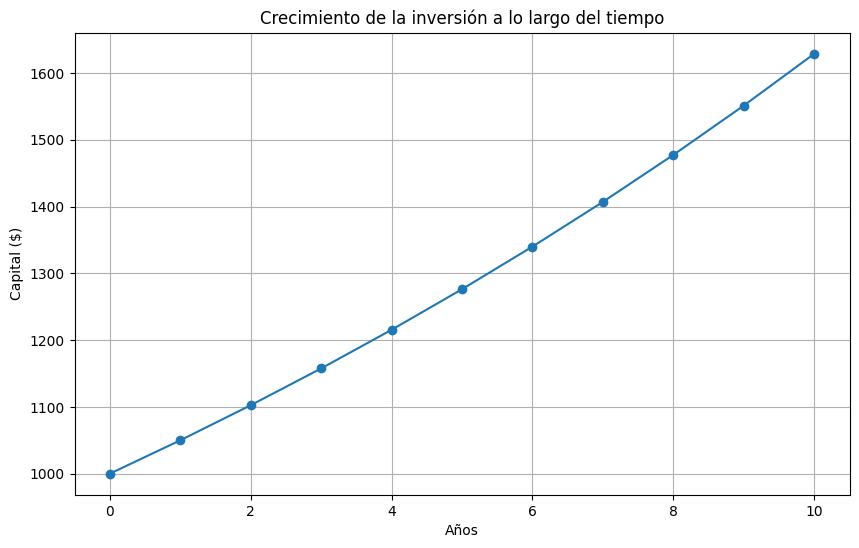

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Parametros iniciales
capital_inicial = 1000 # Capital inicial en USD
tasa_interes = .05 #interés mensual
años = 10

cptl = [capital_inicial]

for n in range(1, años +1):
    cptl.append(cptl[n-1]*(1+tasa_interes))

años = np.arange(0, años +1)

plt.figure(figsize=(10,6))
plt.plot(años, cptl, 'o-')
plt.title("Crecimiento de la inversión a lo largo del tiempo")
plt.xlabel("Años")
plt.ylabel("Capital ($)")
plt.grid(True)
plt.show()



* Datos científicos o de ingeniería que siguen un relación exponencial, logarítmica o sinusoidal (por ejemplo, decaimiento radioactivo, crecimiento de la población)

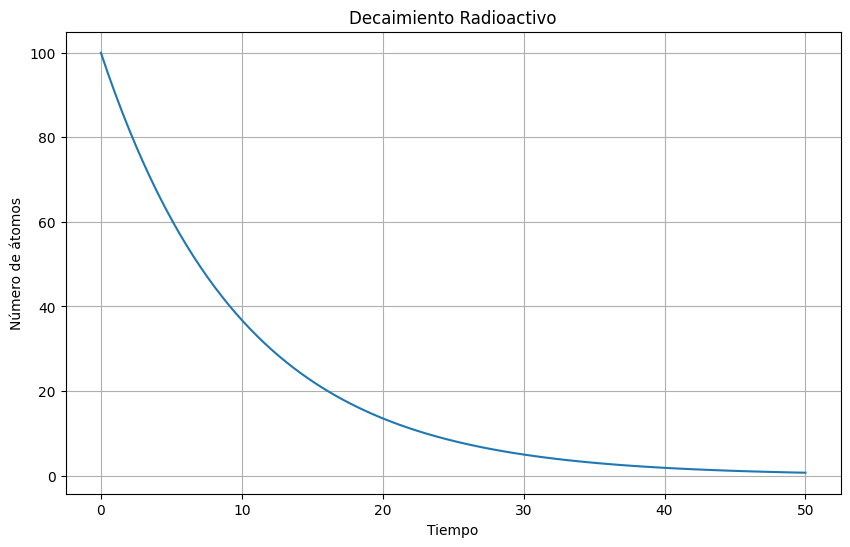

In [58]:
N0 = 100 #número inicial de atomos
lambda_ = 0.1 #constante de decaimiento

t = np.linspace(0,50, 100)

N = N0*np.exp(-lambda_*t)

plt.figure(figsize=(10,6))
plt.plot(t, N, '-')
plt.title("Decaimiento Radioactivo")
plt.xlabel("Tiempo")
plt.ylabel("Número de átomos")
plt.grid(True)
plt.show()

#### Conceptualización

Supongamos que tenemos una relación entre $ x $ y $ y $ que no parece ser lineal. Una manera de ajustar una curva a estos datos es considerar un polinomio de grado $ n $:

$$ y = \beta_0 + \beta_1x + \beta_2x^2 + \ldots + \beta_nx^n + \epsilon $$

Donde:

- $ y $ es la variable dependiente.
- $ x $ es la variable independiente.
- $ \beta_0, \beta_1, \ldots, \beta_n $ son los coeficientes del polinomio.
- $ \epsilon $ es el error aleatorio.
- $ n $ es el grado del polinomio.

La regresión polinomial busca encontrar los coeficientes $ \beta $ que minimizan la suma de los cuadrados de los errores (diferencias entre los valores observados y los valores predichos).

##### Expansión Polinómica:
La regresión polinómica se encarga de introducir potencias de las variables independientes en el modelo de regresión esta técnica busca adaptarse mejor a los datos cuando existe una relación no lineal entre las variables.


La expansión polinómica es un proceso matemático que expresa un producto de sumas como una suma de productos. En otras palabras, se trata de descomponer una expresión polinómica en términos más simples. Un ejemplo común de expansión polinómica es el binomio.

La expansión del binomio, como $(x+y)^n$, se puede obtener utilizando el triángulo de Pascal. Los coeficientes de los terminos en la expansión corresponden a los numeros en la fila $(n+1)$ del triangulo de Pascal. Por ejemplo, al expandir $(x+y)^3$, obtenemos $x^3+3x^2y+3xy^2+y^3$.

Además, la expansión polinómica puede implicar pasos de reescritura anidados múltiples, como trabajar en un esquema de horner para el polinomio que define. El proceso opuesto de tratar de describir un polinomio expandido como un producto se llama factorización polinómica.

In [20]:
def pascal(n):
    # Inicializar la lista vacía
    triángulo = [[1]]
    
    # Generar las filas del triángulo
    for i in range(1, n):
        fila = [1]
        última_fila = triángulo[-1]
        # Generar los elementos de la fila
        for j in range(len(última_fila) - 1):
            elemento = última_fila[j] + última_fila[j + 1]
            fila.append(elemento)
        fila.append(1)
        triángulo.append(fila)
    
    # Imprimir el triángulo
    for fila in triángulo:
        print(fila)

# Llamar a la función para generar el triángulo de Pascal con 5 filas
pascal(5)


[1]
[1, 1]
[1, 2, 1]
[1, 3, 3, 1]
[1, 4, 6, 4, 1]


Uso de PolynomialFeatures

MSE entrenamiento:  3.698204452658229
MSE prueba:  4.900188579349


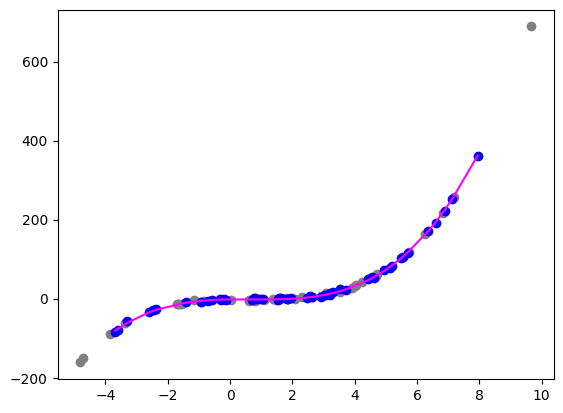

In [21]:

# Importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import operator

# Generar algunos datos no lineales basados en una función cuadrática
np.random.seed(0)
X = 2 - 3 * np.random.normal(0, 1, 100)
y = X - 2 * (X ** 2) + np.random.normal(-2, 2, 100) + np.random.rand()*(X ** 3)
X = X[:, np.newaxis]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Preprocesamiento: Transformación Polinómica
polynomial_features = PolynomialFeatures(degree=3) # Cambiar el grado para experimentar
X_poly_train = polynomial_features.fit_transform(X_train)
X_poly_test = polynomial_features.transform(X_test)

# Regresión lineal
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Hacer predicciones
y_train_predicted = model.predict(X_poly_train)
y_test_predicted = model.predict(X_poly_test)

# Evaluación del modelo
mse_train = mean_squared_error(y_train, y_train_predicted)
mse_test = mean_squared_error(y_test, y_test_predicted)

print("MSE entrenamiento: ", mse_train)
print("MSE prueba: ", mse_test)

# Visualizar los resultados
plt.scatter(X_train, y_train, color='gray')
plt.scatter(X_test, y_test, color='blue')
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_test, y_test_predicted), key=sort_axis)
X_test, y_test_predicted = zip(*sorted_zip)
plt.plot(X_test, y_test_predicted, color='magenta')
plt.show()


* Transformación de características, no del modelo:
La esencia de la regresión polinómica radica en transformar o expandir las características, no en cambiar la naturaleza lineal del modelo. Esto permite que se utilicen los mismos algoritmos de optimización que se usan para la regresión lineal, como el descenso del gradiente o la ecuación normal.

* Modelar relaciones curvas:
Aunque estamos trabajando con un modelo lineal en términos de coeficientes, al expandir las características, el modelo tiene la capacidad de adaptarse a relaciones curvas en los datos. Esto es fundamental para casos donde una línea recta no puede capturar adecuadamente la relación entre las características y la variable objetivo.

#### Consideraciones:

1. **Elección del grado $n$**: Una decisión clave en la regresión polinomial es elegir el grado adecuado del polinomio. Un grado muy bajo podría no capturar la relación subyacente (subajuste), mientras que un grado muy alto podría ajustarse demasiado a los datos y capturar el ruido, resultando en un modelo que no generaliza bien (sobreajuste).
2. **Multicolinealidad**: A medida que aumentamos el grado del polinomio, las potencias de $x$ pueden llegar a ser altamente correlacionadas. Esto puede hacer que la estimación de los coeficientes sea numéricamente inestable y llevar a interpretaciones erróneas.
3. **Centrar y escalar**: Es común centrar (restar la media) y escalar (dividir por la desviación estándar) las variables antes de calcular las potencias para reducir problemas de multicolinealidad.
4. **Interpretación**: Si bien la regresión polinomial puede proporcionar un buen ajuste a los datos, la interpretación de los coeficientes puede ser menos intuitiva que en la regresión lineal simple.
5. **Relación global**: Aunque la regresión polinomial permite modelar relaciones no lineales, sigue siendo una relación global. Es decir, la forma de la curva es la misma en todo el rango de $x$. Si se sospecha que la relación cambia en diferentes rangos de $x$, otras técnicas como la regresión por tramos o los modelos aditivos generalizados podrían ser más adecuadas.

#### Grado del polinomio y overfitting

La relación entre el grado del polinomio en una regresión polinomial y el sobreajuste (overfitting, en inglés) es fundamental en el aprendizaje automático y la modelización estadística. Veamos más detalladamente esta relación:

##### Grado del Polinomio:

Cuando hablamos del "grado del polinomio" en el contexto de regresión polinomial, nos referimos al exponente más alto en el polinomio que se utiliza para modelar la relación entre las variables. Por ejemplo, un modelo de grado 2 tiene la forma:

$$ y = \beta_0 + \beta_1x + \beta_2x^2 $$

#### Sobreajuste (Overfitting):

El sobreajuste ocurre cuando un modelo se ajusta demasiado bien a los datos de entrenamiento, capturando no solo las relaciones subyacentes sino también el ruido o las fluctuaciones aleatorias presentes en esos datos. Como resultado, aunque el modelo puede tener un desempeño excelente en los datos de entrenamiento, es probable que tenga un desempeño pobre en datos no vistos o de prueba.

##### Relación entre el Grado del Polinomio y el Sobreajuste:

1. **Grado bajo**: Si usamos un grado de polinomio muy bajo (como 1, que es esencialmente una regresión lineal), corremos el riesgo de subajustar los datos, lo que significa que no capturamos toda la relación subyacente. En este caso, el modelo podría tener un rendimiento insatisfactorio tanto en los datos de entrenamiento como en los de prueba.
2. **Aumento del grado**: A medida que aumentamos el grado del polinomio, el modelo se vuelve más flexible y puede ajustarse mejor a los datos de entrenamiento. Esto puede ser beneficioso hasta cierto punto, especialmente si la relación real entre las variables es de hecho no lineal.
3. **Grado alto**: Sin embargo, si seguimos aumentando el grado del polinomio, el modelo se vuelve extremadamente flexible y comienza a ajustarse a las fluctuaciones aleatorias o al ruido en los datos de entrenamiento. En otras palabras, empieza a "memorizar" los datos en lugar de "aprender" la relación subyacente. En este punto, se produce el sobreajuste. Si evaluamos el modelo en un conjunto de datos de prueba, es probable que su desempeño sea pobre, a pesar de que podría tener un error muy bajo en el conjunto de entrenamiento.

##### Cómo detectar el Sobreajuste:

- Una técnica común es dividir el conjunto de datos en conjuntos de entrenamiento y prueba. Ajusta el modelo en el conjunto de entrenamiento y evalúa su desempeño en el conjunto de prueba. Si hay una gran discrepancia en el rendimiento entre los dos conjuntos (es decir, un rendimiento excelente en el entrenamiento pero pobre en la prueba), es una señal de sobreajuste.
- Otra técnica es utilizar validación cruzada para evaluar el desempeño del modelo a través de diferentes subconjuntos (folds) del conjunto de datos.

En resumen, existe una relación directa entre el grado del polinomio en una regresión polinomial y el potencial de sobreajuste: a medida que el grado aumenta, también lo hace la flexibilidad del modelo y el riesgo de sobreajuste. Es esencial encontrar un equilibrio, y para ello se deben usar técnicas de evaluación robustas y posiblemente métodos de regularización.

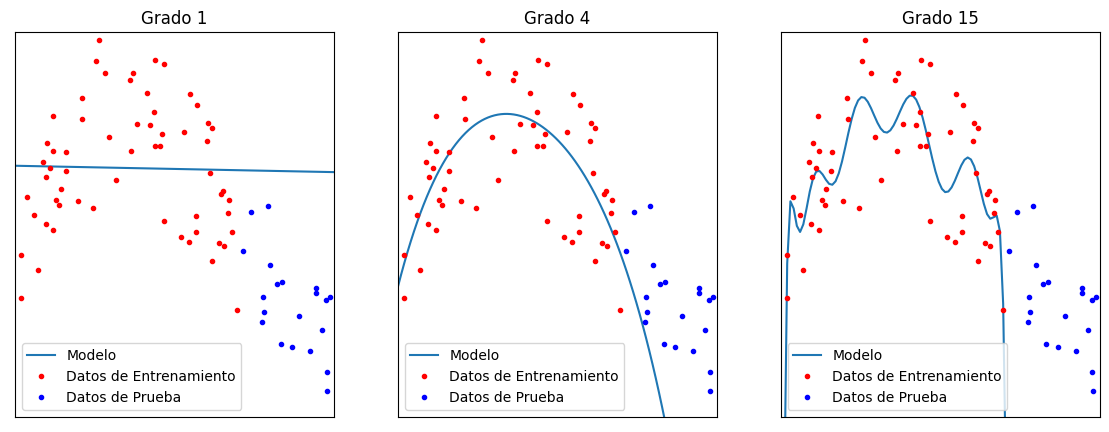

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# 1. Generar Datos Simulados
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.5, X.shape[0])

# Dividir los datos en entrenamiento y prueba
X_train, X_test = np.split(X, [60])
y_train, y_test = np.split(y, [60])

x_plot = np.linspace(0, 5, 100)

# 2. Ajustar Modelos Polinómicos
degrees = [1, 4, 15]
plt.figure(figsize=(14, 5))

for i, degree in enumerate(degrees):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial = PolynomialFeatures(degree=degree)
    linear_regression = LinearRegression()
    pipeline = make_pipeline(polynomial, linear_regression)
    pipeline.fit(X_train, y_train)
    
    y_plot = pipeline.predict(x_plot[:, np.newaxis])
    plt.plot(x_plot, y_plot, label="Modelo")
    plt.plot(X_train, y_train, 'r.', label="Datos de Entrenamiento")
    plt.plot(X_test, y_test, 'b.', label="Datos de Prueba")
    plt.xlim((0, 5))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(f"Grado {degree}")

plt.show()


##### Selección del Grado del polinomio

La selección adecuada del grado del polinomio en una regresión polinomial es crucial para el rendimiento del modelo. Un grado inapropiado puede llevar a un subajuste o a un sobreajuste del modelo, como ya discutimos anteriormente.

**Visualización:**

Si el conjunto de datos no es demasiado grande, visualizarlo puede dar una idea inicial del tipo de relación que podría existir entre las variables. Aunque esto es subjetivo y no es definitivo, puede proporcionar una pista sobre qué grados intentar primero.

El uso de gráficos para visualizar cómo cambia el ajuste del modelo: Al trazar las curvas polinomiales de diferentes grados sobre los datos, podemos ver visualmente si un modelo está capturando la tendencia general (buen ajuste), ignorando demasiada variabilidad (subajuste) o capturando el ruido (sobreajuste).



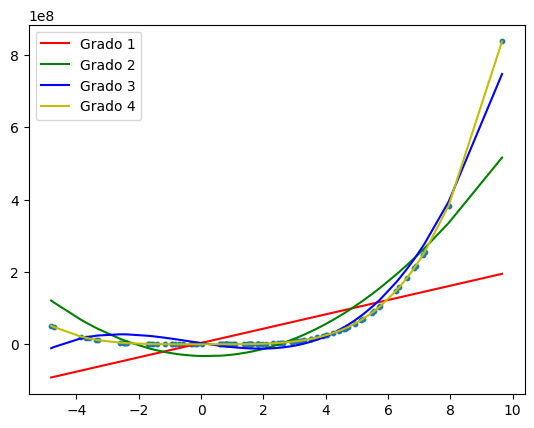

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Tus datos
np.random.seed(0)
X = 2 - 3 * np.random.normal(0, 1, 100)
y = X - 2 * (X ** 2) + np.random.normal(-2, 2, 100) + 100000* np.random.rand()*(X ** 4) + 100*np.random.rand()*(X ** 2)
X = X[:, np.newaxis]

# Crear y ajustar modelos
plt.scatter(X, y, s=10)
colors = ['r', 'g', 'b', 'y']
for index, degree in enumerate([1, 2, 3,4]):
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)
    model = LinearRegression().fit(X_poly, y)
    y_poly_pred = model.predict(X_poly)

    # Ordenar valores para la visualización
    sorted_zip = sorted(zip(X,y_poly_pred))
    X_, y_poly_pred = zip(*sorted_zip)
    plt.plot(X_, y_poly_pred, color=colors[index], label=f'Grado {degree}')

plt.legend()
plt.show()


**Demostración de underfitting a overfitting:**

* **Underfitting (Subajuste):** Un modelo de grado demasiado bajo (como un polinomio lineal) puede no capturar las curvaturas y patrones en los datos, resultando en un ajuste pobre.
* **Overfitting (Sobreajuste):** Por otro lado, un modelo de grado muy alto se ajustará demasiado a los datos, incluidas las fluctuaciones aleatorias. En un gráfico, esto se manifestaría como una curva que "zigzaguea" para pasar por cada punto de datos, lo que indica una alta variabilidad y probable sobreajuste.

##### Validación Cruzada

Una de las técnicas más comunes para seleccionar el grado es usar validación cruzada. Esto implica dividir el conjunto de datos en varios subconjuntos (o "folds") y ajustar y evaluar el modelo en estos subconjuntos varias veces. Luego, se calcula un error promedio de validación cruzada para cada grado.

El grado que minimice este error promedio puede ser una buena elección. Sin embargo, es útil no solo basarse en el error mínimo sino también considerar la complejidad del modelo. Si dos modelos (por ejemplo, de grados 3 y 5) tienen errores muy similares, podría ser prudente optar por el modelo más simple (grado 3 en este caso).

El grado óptimo del polinomio es: 4


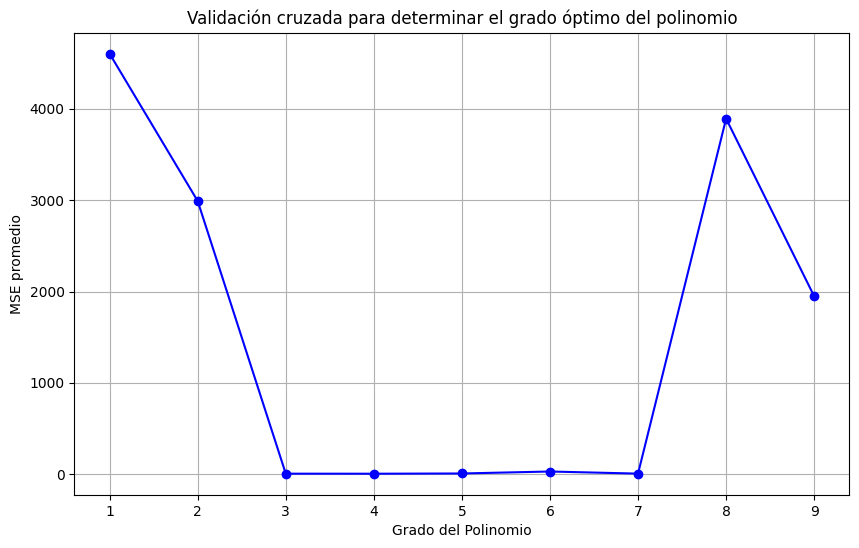

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
degrees = np.arange(1, 10)  # Vamos a evaluar polinomios de grado 1 a 9
mse_scores = []

for degree in degrees:
    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly = polynomial_features.fit_transform(X)
    
    lin_reg = LinearRegression()
    scores = cross_val_score(lin_reg, X_poly, y, cv=5, scoring='neg_mean_squared_error') # Usamos 5-fold CV
    mse_scores.append(-scores.mean())  # Convertir de nuevo a MSE positivo para facilitar la interpretación

# Identificar el grado con el menor MSE
best_degree = degrees[np.argmin(mse_scores)]

print(f"El grado óptimo del polinomio es: {best_degree}")
plt.figure(figsize=(10, 6))
plt.plot(degrees, mse_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Grado del Polinomio')
plt.ylabel('MSE promedio')
plt.title('Validación cruzada para determinar el grado óptimo del polinomio')
plt.grid(True)
plt.xticks(degrees)
plt.show()


##### Criterios de Información:

Los criterios de información son medidas que buscan encontrar un equilibrio entre la bondad de ajuste del modelo y la complejidad del mismo. Se utilizan ampliamente en la selección de modelos, especialmente cuando se tienen múltiples modelos que compiten entre sí y se desea seleccionar el mejor teniendo en cuenta la complejidad.

1. **Criterio de Información Akaike (AIC):**

    El AIC fue desarrollado por Hirotugu Akaike en 1974. Es un estimador de la cantidad relativa de información perdida por un modelo dado. Su fórmula es:
    
    $$ \text{AIC} = 2k - 2\ln(L) $$
    
    Donde:
    
    - $ k $ es el número de parámetros en el modelo.
    - $ L $ es la máxima verosimilitud del modelo.
    
    El AIC penaliza la adición de parámetros innecesarios al modelo. Un modelo con un valor AIC más bajo es preferible en comparación con uno con un valor AIC más alto.

2. **Criterio de Información Bayesiano (BIC):**

    El BIC, también conocido como Criterio de Schwarz, es similar al AIC pero tiene una penalización más fuerte para modelos con más parámetros. Su fórmula es:

    $$ \text{BIC} = k\ln(n) - 2\ln(L) $$

    Donde:

   - $ k $ es el número de parámetros en el modelo.
   - $ n $ es el número de observaciones (tamaño de la muestra).
   - $ L $ es la máxima verosimilitud del modelo.

    Al igual que el AIC, un valor BIC más bajo indica un mejor modelo. Sin embargo, debido a la penalización más fuerte para la complejidad, el BIC tiende a favorecer modelos más simples en comparación con el AIC, especialmente cuando el tamaño de la muestra es grande.

**Aplicación en la Selección del Modelo:**

Cuando se comparan diferentes modelos (como polinomios de diferentes grados), se pueden calcular el AIC y el BIC para cada uno de ellos. El modelo con el AIC o BIC más bajo es el preferido, ya que este criterio sugiere que proporciona un mejor equilibrio entre la bondad de ajuste y la complejidad.

Es importante recordar que, mientras que el AIC y el BIC pueden proporcionar una guía útil para la selección del modelo, siempre es valioso considerar el contexto y el conocimiento del dominio, así como otras métricas y métodos de validación, al tomar decisiones finales sobre el modelo a elegir.

In [5]:
def compute_aic(n, mse, num_params):
    """
    Compute AIC for a given model.
    n: number of samples
    mse: mean squared error of the model
    num_params: number of parameters in the model
    """
    return n * np.log(mse) + 2 * num_params

def compute_bic(n, mse, num_params):
    """
    Compute BIC for a given model.
    n: number of samples
    mse: mean squared error of the model
    num_params: number of parameters in the model
    """
    return n * np.log(mse) + np.log(n) * num_params


In [ ]:
degrees = np.arange(1, 10)  # Evaluamos polinomios de grado 1 a 9
aic_values = []
bic_values = []

for degree in degrees:
    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly = polynomial_features.fit_transform(X)
    
    lin_reg = LinearRegression().fit(X_poly, y)
    y_pred = lin_reg.predict(X_poly)
    mse = np.mean((y - y_pred)**2)
    
    num_params = degree + 1  # coeficientes más el término independiente
    aic_values.append(compute_aic(len(y), mse, num_params))
    bic_values.append(compute_bic(len(y), mse, num_params))

best_degree_aic = degrees[np.argmin(aic_values)]
best_degree_bic = degrees[np.argmin(bic_values)]

print(f"El grado óptimo del polinomio según AIC es: {best_degree_aic}")
print(f"El grado óptimo del polinomio según BIC es: {best_degree_bic}")


El grado óptimo del polinomio según AIC es: 3
El grado óptimo del polinomio según BIC es: 3
